#3 Import the required packages with their customary aliases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#4 Use the `%matplotlib inline` magic command so that your plots show in the notebook _without_ having to call `plt.show()` every time.

In [2]:
%matplotlib inline

#5.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN


In [4]:
gdp_df.shape

(7176, 4)

#6. Repeat for the internet use dataset. Call this DataFrame `internet_df`. Take a look at the first six rows.


In [5]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


#98. Look at the shape of each DataFrame - how many rows? How many columns?


In [6]:
gdp_df.shape

(7176, 4)

There are 7176 rows and 4 columns in gdp dataframe

In [7]:
internet_df.shape

(4495, 4)

There are 4675 rows and 4 columns in internet_use dataframe

#6.	Take a look at the datatypes for the columns in each DataFrame.


In [8]:
print(type(gdp_df['Country or Area']))
print(type(gdp_df.Year))
print(type(gdp_df.Value))
print(type(gdp_df['Value Footnotes']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Show data types of columns:

In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


In [10]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


Different datatypes between the two DFs. gdp_df: obj, int64, float64, float64. internet_df: object, object, float64, float64.

Drop Column 'Value Footnote'

#99. Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
gdp_three = gdp_df.drop(columns = ['Value Footnotes'])
internet_three = internet_df.drop(columns = ['Value Footnotes'])
gdp_three.head()
internet_three.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [12]:
gdp_three.tail(10)

internet_three.tail(10)

,Country or Area,Year,Value
4485,Zimbabwe,2002,3.994356
4486,Zimbabwe,2001,0.799846
4487,Zimbabwe,2000,0.401434
4488,Zimbabwe,1999,0.161676
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


#7.	Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.


#8.	Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.


In [13]:
gdp_three.columns = ['Country','Year', 'GDP_Per_Capita']
gdp_three.head()


,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


Change gpd_three DF "Year" column to object to be able to merge with internet_three DF

#9.	Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [14]:
internet_three.columns = ['Country','Year', 'Internet_Users_Pct']
internet_three

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


#10. Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.

In [15]:
gdp_and_internet_use = pd.merge(gdp_three, internet_three, on=['Country', 'Year'], how='outer')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


#11. Look at the first five rows of your new DataFrame to confirm it merged correctly.


In [16]:
gdp_and_internet_use.shape

(8256, 4)

#12. Look at the last five rows to make sure the data is clean and as expected.

In [17]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621
8255,Yemen,1990,NaN,0.000000


#13. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [18]:
three_year = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004,2009,2014])]
three_year.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.390000
11,Afghanistan,2009,1758.904477,3.550000
16,Afghanistan,2004,1200.278013,0.105809
25,Africa Eastern and Southern,2014,3677.319414,NaN
30,Africa Eastern and Southern,2009,3461.681409,NaN


Check for years in new DataFrame:

In [19]:
check_years = list(three_year.Year)
set(check_years)

{2004, 2009, 2014}

In [20]:
three_year.Year.value_counts()

2014    281
2009    281
2004    279
Name: Year, dtype: int64

#14. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.


In [21]:
df_2004 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2004]
df_2009 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2009]
df_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
df_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09


#15. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).


In [22]:
df_2014.loc[gdp_and_internet_use['Internet_Users_Pct'] == df_2014['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.741612,98.16


#16. Which country had the lowest percentage of internet users in 2014? What was the percentage?


In [23]:
df_2014.loc[gdp_and_internet_use['Internet_Users_Pct'] == df_2014['Internet_Users_Pct'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7394,Dem. People's Rep. of Korea,2014,NaN,0.0


#17. Repeat for 2004 and 2009.


In [24]:
print('Max internet users percent in 2004:')
print('----------------------------------')
print(df_2004.loc[gdp_and_internet_use['Internet_Users_Pct'] == df_2004['Internet_Users_Pct'].max()])
print()
print('Min internet users percent in 2004:')
print('----------------------------------')
print(df_2004.loc[gdp_and_internet_use['Internet_Users_Pct'] == df_2004['Internet_Users_Pct'].min()])
print()
print('Max internet users percent in 2009:')
print('----------------------------------')
print(df_2009.loc[gdp_and_internet_use['Internet_Users_Pct'] == df_2009['Internet_Users_Pct'].max()])
print()
print('Min internet users percent in 2009:')
print('----------------------------------')
print(df_2009.loc[gdp_and_internet_use['Internet_Users_Pct'] == df_2009['Internet_Users_Pct'].min()])


Max internet users percent in 2004:
----------------------------------
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
6298  Sweden  2004    44354.391062               83.89

Min internet users percent in 2004:
----------------------------------
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7403  Dem. People's Rep. of Korea  2004             NaN                 0.0

Max internet users percent in 2009:
----------------------------------
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2808  Iceland  2009    48770.950337                93.0

Min internet users percent in 2009:
----------------------------------
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7398  Dem. People's Rep. of Korea  2009             NaN                 0.0


#18. Which country had the highest gdp per capita in 2014? What was the gdp per capita?


In [25]:
df_2014.loc[gdp_and_internet_use['GDP_Per_Capita'] == df_2014['GDP_Per_Capita'].max()]


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3919,"Macao SAR, China",2014,155201.740571,NaN


#20. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?


In [26]:
df_2014.loc[gdp_and_internet_use['GDP_Per_Capita'] == df_2014['GDP_Per_Capita'].min()]


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1142,Central African Republic,2014,822.611195,NaN


21.	Create some scatterplots: 
    A) 2004 Internet vs GDP

Text(0, 0.5, 'GDP per capita')

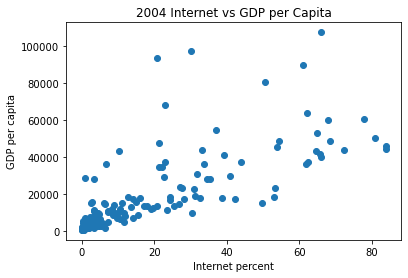

In [27]:
plt.scatter(df_2004.Internet_Users_Pct, df_2004.GDP_Per_Capita)
plt.title('2004 Internet vs GDP per Capita')
plt.xlabel('Internet percent')
plt.ylabel('GDP per capita')

B) 2009 Internet vs GDP

Text(0, 0.5, 'GDP per capita')

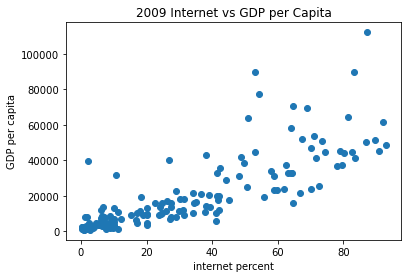

In [28]:
plt.scatter(df_2009.Internet_Users_Pct, df_2009.GDP_Per_Capita)
plt.title('2009 Internet vs GDP per Capita')
plt.xlabel('internet percent')
plt.ylabel('GDP per capita')

C) 2014 Internet vs GDP

Text(0, 0.5, 'GDP per capita')

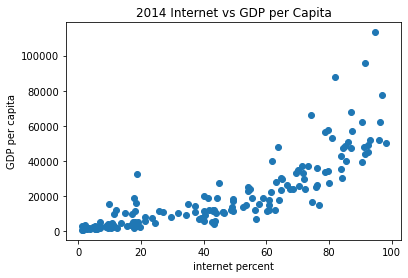

In [29]:
plt.scatter(df_2014.Internet_Users_Pct, df_2014.GDP_Per_Capita)
plt.title('2014 Internet vs GDP per Capita')
plt.xlabel('internet percent')
plt.ylabel('GDP per capita')

#22. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.


Yes, internet usage has increased over the years. There is a positive correlation between the two variables as time goes on.

#23. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

Text(0.5, 1.0, 'Distribution of GDP per Capita in 2014')

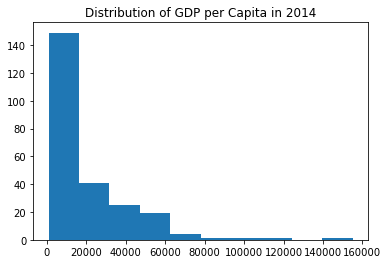

In [30]:
plt.hist(df_2014.GDP_Per_Capita)
plt.title ('Distribution of GDP per Capita in 2014')

Yes the distribution is unimodal.

#24. Look at the distribution of Internet Use for 2014. Is it unimodal?

Text(0.5, 1.0, 'Distribution of Internet use Percent in 2014')

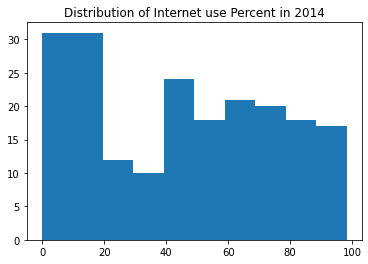

In [31]:
plt.hist(df_2014.Internet_Users_Pct)
plt.title ('Distribution of Internet use Percent in 2014')

Internet use percentage is NOT unimodal.

#25. What are the top 5 countries in terms of internet use in 2014?

In [32]:
internet_2014 = df_2014.sort_values(ascending=False, by=['Internet_Users_Pct']).head(5)
internet_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.741612,98.16
645,Bermuda,2014,77361.104881,96.80
4880,Norway,2014,62390.130313,96.30
1561,Denmark,2014,52048.335493,95.99
7179,Andorra,2014,NaN,95.90


#26. Create a DataFrame called top_5_internet **from the combined DataFrame that has all three years _for the 5 countries that had the greatest 2014 internet usage_**. You should have 15 rows. Check that this is true.

In [33]:
#top_5_internet = three_year.loc[three_year.Country.isin(['Iceland','Bermuda','Norway','Denmark','Andorra'])]

top_5_internet = three_year.loc[three_year.Country.isin(list(internet_2014.Country))]

top_5_internet.shape

(15, 4)

#27. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?


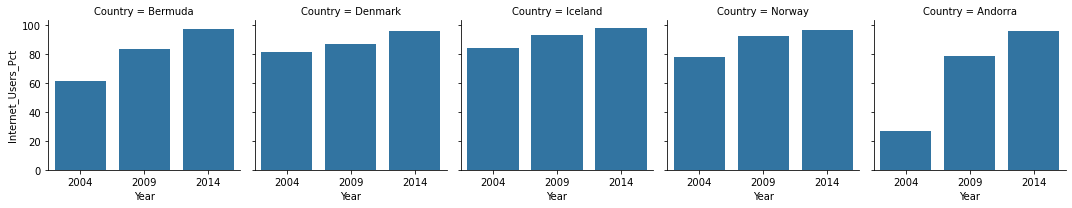

In [34]:
g = sns.FacetGrid(top_5_internet, col='Country')
g.map_dataframe(sns.barplot,x='Year', y='Internet_Users_Pct')

#28. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?


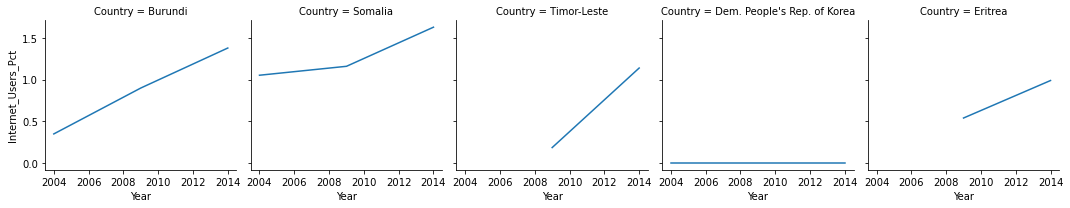

In [35]:
low_5_internet = df_2014.sort_values(ascending=True, by=['Internet_Users_Pct']).head(5)

bottom_5_internet = three_year.loc[three_year.Country.isin(list(low_5_internet.Country))]

g = sns.FacetGrid(bottom_5_internet, col='Country')
g.map_dataframe(sns.lineplot,x='Year', y='Internet_Users_Pct')

In [36]:
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
920,Burundi,2014,886.235296,1.380000
925,Burundi,2009,831.564843,0.900000
930,Burundi,2004,817.461177,0.349060
5877,Somalia,2014,917.876549,1.630000
6536,Timor-Leste,2014,3266.731666,1.140000
6541,Timor-Leste,2009,2729.281474,0.185252
6546,Timor-Leste,2004,2258.384170,NaN
7394,Dem. People's Rep. of Korea,2014,NaN,0.000000
7398,Dem. People's Rep. of Korea,2009,NaN,0.000000
7403,Dem. People's Rep. of Korea,2004,NaN,0.000000


#29. Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

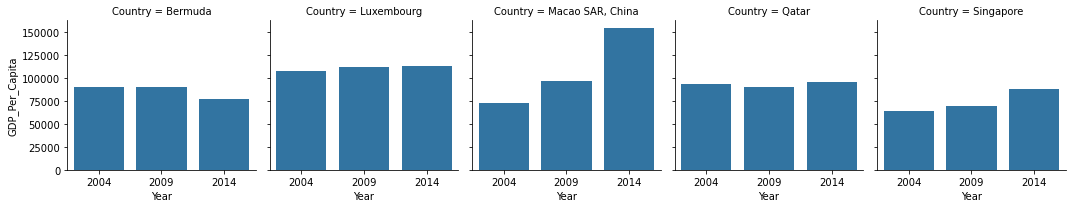

In [37]:
top_5_gdp_2014 = df_2014.sort_values(ascending=False, by=['GDP_Per_Capita']).head(5)

top_5_gdp_10 = three_year.loc[three_year.Country.isin(list(top_5_gdp_2014.Country))]

g = sns.FacetGrid(top_5_gdp_10, col='Country')
g.map_dataframe(sns.barplot,x='Year', y='GDP_Per_Capita')

#96. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

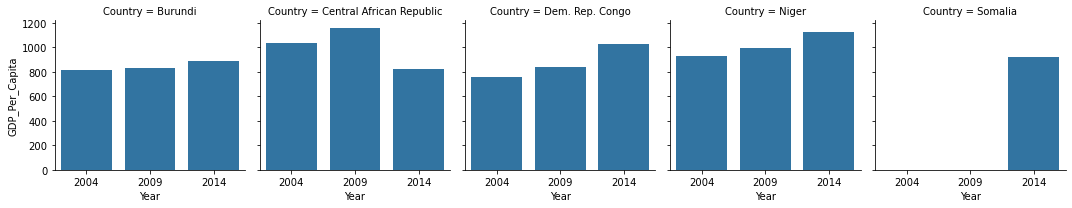

In [38]:
low_5_gdp = df_2014.sort_values(ascending=True, by=['GDP_Per_Capita']).head()

low_5_gdp_10 = three_year.loc[three_year.Country.isin(list(low_5_gdp.Country))]

g = sns.FacetGrid(low_5_gdp_10, col='Country')
g.map_dataframe(sns.barplot,x='Year', y='GDP_Per_Capita')

#30. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

- There is no GDP data for Somalia in 2004 and 2009.
- There is no Internet data for Dem. People's Rep. Korea
- Central African Republic GDP dropped significantly from 2009 to 2014 where other countries go up over time.
- Macao SAR, China GDP has grown faster than other countries.

Bonus: Download another data set to merge with data and explore.

In [45]:
# Downloaded Total electricity consumption data. Make DF called total electricity from CSV file.
total_electricity = pd.read_csv('../data/total_electricity.csv')

# Drop uneccessary columns
elec_three = total_electricity.drop(columns=['Commodity - Transaction','Unit', 'Quantity Footnotes'])

# Rename columns for merge
elec_three.columns = ['Country','Year','kW_units']

# Merge DFs
total_stat_df = pd.merge(elec_three, gdp_and_internet_use, on=['Country','Year'], how ='outer')

# New DF with stats on electricity usage, GDP per capita, and percentage of internet use. By Country and by Year.
total_stat_df.head()

,Country,Year,kW_units,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020.0,5760.0,1970.560169,NaN
1,Afghanistan,2019.0,5777.0,2065.036235,NaN
2,Afghanistan,2018.0,5552.0,2033.804389,NaN
3,Afghanistan,2017.0,5357.0,2058.400221,NaN
4,Afghanistan,2016.0,5080.0,2057.067978,NaN


Explore:

In [48]:
# Extract for 3 years
df2_2004 = total_stat_df.loc[total_stat_df['Year'] == 2004]
df2_2009 = total_stat_df.loc[total_stat_df['Year'] == 2009]
df2_2014 = total_stat_df.loc[total_stat_df['Year'] == 2014]
df2_2014.head()

,Country,Year,kW_units,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014.0,4492.000,2102.384604,6.39
37,Albania,2014.0,6523.200,11586.833878,60.10
67,Algeria,2014.0,45751.000,11512.690472,18.09
97,American Samoa,2014.0,136.077,NaN,NaN
128,Andorra,2014.0,474.500,NaN,95.90


DF for 2004 information

In [59]:
# Top 10 countries by Electrical Consumption in 2004
df2_2004.sort_values(ascending=False, by=['kW_units']).head(10)

,Country,Year,kW_units,GDP_Per_Capita,Internet_Users_Pct
6579,United States,2004.0,3636065.0,52988.112180,64.758256
1260,China,2004.0,1718045.0,4817.211845,7.300000
3152,Japan,2004.0,1001072.0,37576.389892,62.393930
5251,Russian Federation,2004.0,645532.0,NaN,NaN
2371,Germany,2004.0,521268.0,43605.278672,64.730000
1107,Canada,2004.0,506753.0,40426.231334,65.955963
2174,France,2004.0,420160.0,41272.632375,39.150000
2893,India,2004.0,386134.0,3054.918876,1.976136
835,Brazil,2004.0,346746.0,12316.374186,19.073672
6519,United Kingdom,2004.0,338946.0,41997.606214,65.610000


Scatter plot

Text(0, 0.5, 'Electricity Consumption')

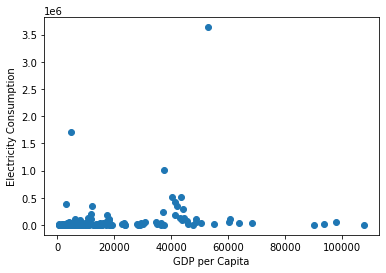

In [55]:
plt.scatter(df2_2004.GDP_Per_Capita, df2_2004.kW_units)
plt.xlabel('GDP per Capita')
plt.ylabel('Electricity Consumption')